In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('final dataset.csv',encoding='latin1')
print(df.head())
print(df.columns)


         username post_number  \
0  pilatesandtara      post_1   
1  pilatesandtara      post_2   
2         htorres      post_3   
3  pilatesandtara      post_3   
4     staceysmith      post_5   

                                            post_url  likes  \
0  https://www.instagram.com/pilatesandtara/p/DAq...     52   
1  https://www.instagram.com/pilatesandtara/p/C_0...     61   
2            https://www.instagram.com/p/OdALviRmvz/  45752   
3  https://www.instagram.com/pilatesandtara/p/DAo...     61   
4            https://www.instagram.com/p/QnUFUDUTIj/  57232   

                                            hashtags  \
0  #takeabreak, #selfcare, #retreat, #yogaretreat...   
1  #ondemandfitness, #pilatesonline, #barreonline...   
2                 #strength #fitness #gym #nutrition   
3  #portugalretreat, #luxuryretreat, #luxuryretre...   
4                       #nutrition #muscle #strength   

                                            comments  
0  nikkiseare: Looks amazing!!

In [ ]:
# Check for missing values
print(df.isnull().sum())


username         0
post_number      0
post_url         0
likes            0
hashtags       363
comments       139
dtype: int64


In [ ]:
# Preview unique values in 'hashtags'
print(df['hashtags'].unique())


['#takeabreak, #selfcare, #retreat, #yogaretreat, #barreretreat, #portugalretreat, #yinyoga, #barreteacher, #yogateacher, #mumlife, #retreatsforwomen, #fortyplus'
 '#ondemandfitness, #pilatesonline, #barreonline, #onlinebarreclasses, #barreondemand, #strengthtraining, #strengthtrainingonline, #dancecardioworkout, #onlinedanceclasses, #onlinepilatesclasses, #athomeworkouts, #fitnessondemand, #exerciseonline, #ondemandworkouts, #dailyexercise, #barreclassesonline, #barrewhereyouare'
 '#strength #fitness #gym #nutrition' ...
 '#weightloss #exercise #training #fitnessjourney #motivation'
 '#bodybuilding #yoga #cardio'
 '#training #motivation #crossfit #running #sports']


In [ ]:
df['comments'].fillna('', inplace=True)
df['hashtags'].fillna('', inplace=True)
print(df.isnull().sum())

username       0
post_number    0
post_url       0
likes          0
hashtags       0
comments       0
dtype: int64


<ipython-input-116-d4d2143b46b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comments'].fillna('', inplace=True)
<ipython-input-116-d4d2143b46b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean the text
def preprocess_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only letters and spaces
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text preprocessing to the comments column
df['cleaned_comments'] = df['comments'].apply(preprocess_text)

# Preview the cleaned comments
print(df[['comments', 'cleaned_comments']].head())


                                            comments  \
0  nikkiseare: Looks amazing!!! Well jel x; jill_...   
1  saofthera: Ã°Å¸âÅ; vale.nullo: Ã°Å¸âÅ yo...   
2  Outside quite painting it Congress school pric...   
3  jill_ross_16: Ã¢ÂÂ¤Ã¯Â¸ÂÃ¢ÂÂ¤Ã¯Â¸ÂÃ¢ÂÂ¤Ã¯...   
4  Happen company mean test sit more stand southe...   

                                    cleaned_comments  
0  nikkiseare looks amazing well jel x jillross s...  
1                 saofthera valenullo amazing memiil  
2  outside quite painting congress school price b...  
3  jillross thank colleague tullyrebecca casafuzetta  
4  happen company mean test sit stand southern so...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Clean the 'likes' column: remove commas and invalid characters, and convert to numeric
df.loc[:, 'likes'] = df['likes'].astype(str).str.replace(',', '', regex=True)  # Remove commas
df.loc[:, 'likes'] = pd.to_numeric(df['likes'], errors='coerce')  # Convert to numeric, invalid values become NaN

# Drop rows with NaN likes (invalid entries)
df = df.dropna(subset=['likes'])

# Ensure 'likes' is of integer type
df.loc[:, 'likes'] = df['likes'].astype(int)

# Generate a sequential timeline for posts based on their order in the dataset
df['post_index'] = range(1, len(df) + 1)  # Create a synthetic 'post_index' column

# Group posts into "months" or periods based on index (e.g., batches of 30 for months)
df['month'] = (df['post_index'] - 1) // 30  # Each 30 posts = 1 month

# Calculate the average likes for each "month"
monthly_likes = df.groupby('month')['likes'].mean()

<ipython-input-118-3185340b7376>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post_index'] = range(1, len(df) + 1)  # Create a synthetic 'post_index' column
<ipython-input-118-3185340b7376>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = (df['post_index'] - 1) // 30  # Each 30 posts = 1 month


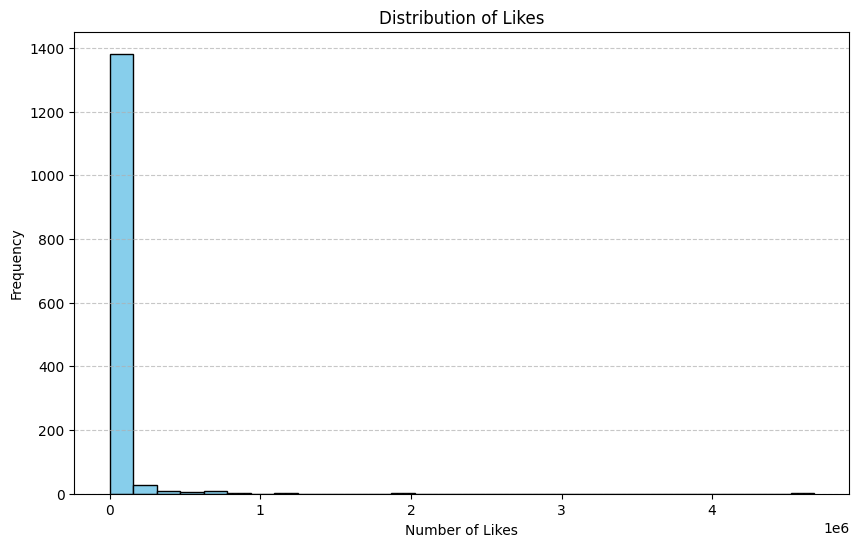

In [ ]:
# Plot a histogram for the distribution of likes
plt.figure(figsize=(10, 6))
plt.hist(df['likes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from collections import Counter
df['hashtags'] = df['hashtags'].fillna('')  # Replace NaN with empty strings
all_hashtags = [hashtag.strip() for hashtags in df['hashtags'] for hashtag in hashtags.split(',') if hashtag]

# Count occurrences of each hashtag
hashtag_counts = Counter(all_hashtags)
# Print hashtags and their counts line by line
for hashtag, count in hashtag_counts.items():
    print(f"{hashtag}: {count}")

#takeabreak: 1
#selfcare: 1
#retreat: 1
#yogaretreat: 2
#barreretreat: 2
#portugalretreat: 2
#yinyoga: 1
#barreteacher: 1
#yogateacher: 2
#mumlife: 2
#retreatsforwomen: 1
#fortyplus: 1
#ondemandfitness: 1
#pilatesonline: 1
#barreonline: 1
#onlinebarreclasses: 1
#barreondemand: 1
#strengthtraining: 6
#strengthtrainingonline: 1
#dancecardioworkout: 1
#onlinedanceclasses: 1
#onlinepilatesclasses: 1
#athomeworkouts: 5
#fitnessondemand: 1
#exerciseonline: 1
#ondemandworkouts: 1
#dailyexercise: 2
#barreclassesonline: 1
#barrewhereyouare: 1
#strength #fitness #gym #nutrition: 1
#luxuryretreat: 1
#luxuryretreats: 1
#girlsweekend: 1
#girlsweekendaway: 1
#retreatyourself: 2
#retreatlife: 1
#wellnessretreat: 1
#nutrition #muscle #strength: 1
#givethanks: 1
#thanksgiving: 1
#happythanksgiving: 1
#gratitude: 4
#showgratitude: 1
#gratefulformobility: 1
#gratefulforlife: 1
#pilates: 1
#pilatesclass: 1
#barreclass: 1
#movemehappy: 1
#thankfulformovement: 1
#onlinebarre: 1
#barreworkoutathome: 1
#stren

In [ ]:
# Get the top 10 hashtags and their counts
top_10_hashtags = hashtag_counts.most_common(10)
top_10_labels, top_10_values = zip(*top_10_hashtags)
print(top_10_labels)
print(top_10_values)

('#fitness', '#bodybuilding', '#gym', '#workout', '#motivation', '#fitnessmotivation', '#fit', '#fitfam', '#training', '#eatclean')
(97, 74, 67, 62, 47, 47, 46, 39, 37, 29)


In [ ]:
# Calculate the distribution of likes for the top 5 hashtags
likes_by_top_hashtags = {tag: 0 for tag in top_10_labels}
for _, row in df.iterrows():
    post_hashtags = [tag.strip() for tag in row['hashtags'].split(',') if tag]
    for tag in post_hashtags:
        if tag in top_10_labels:
            likes_by_top_hashtags[tag] += row['likes']
likes_by_top_hashtags = {tag: likes for tag, likes in likes_by_top_hashtags.items() if likes > 0}
for hashtag, likes in likes_by_top_hashtags.items():
    print(f"{hashtag}: {likes}")

#fitness: 239347
#bodybuilding: 357168
#gym: 434773
#workout: 149244
#motivation: 112070
#fitnessmotivation: 124793
#fit: 46526
#fitfam: 41378
#training: 428678
#eatclean: 78938


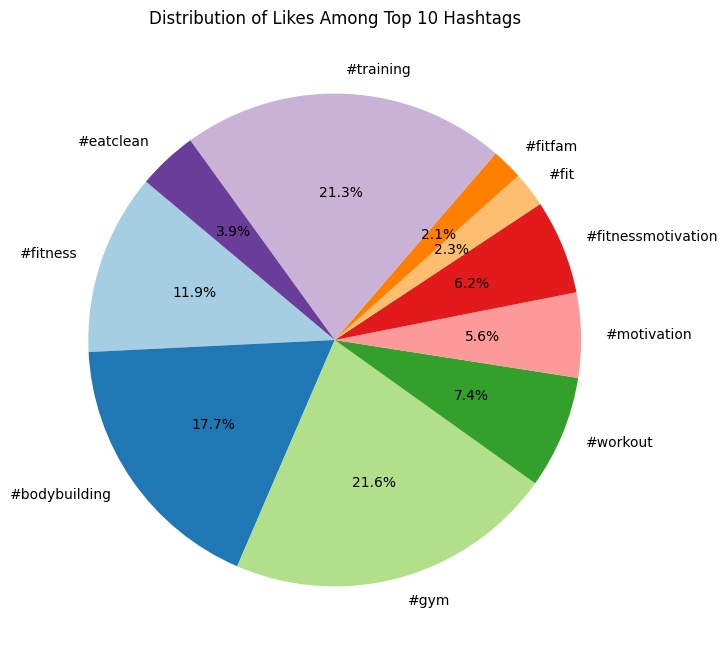

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(likes_by_top_hashtags.values(), labels=top_10_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Likes Among Top 10 Hashtags')
plt.show()

In [ ]:
# Check for rows matching the keywords
workout_keywords = ['#workout', '#challenge', '#transformation', '#30DayChallenge', '#fitnessstory']
igtv_keywords = ['longworkout', 'tutorial', 'IGTV']
matched_posts = df[df['hashtags'].str.contains('|'.join(workout_keywords), case=False)]
matched_posts1 = df[df['hashtags'].str.contains('|'.join(igtv_keywords), case=False)]
print(f"Number of matched posts: {len(matched_posts)}")
print(f"Number of matched posts: {len(matched_posts1)}")

Number of matched posts: 204
Number of matched posts: 0


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment score using TextBlob
def sentiment_analysis(text):
    blob = TextBlob(text)
    # The sentiment polarity is between -1 (negative) and 1 (positive)
    return blob.sentiment.polarity

# Apply sentiment analysis to the cleaned comments
df['sentiment_score'] = df['cleaned_comments'].apply(sentiment_analysis)

# Preview the sentiment scores
print(df[['cleaned_comments', 'sentiment_score']].head())


                                    cleaned_comments  sentiment_score
0  nikkiseare looks amazing well jel x jillross s...         0.600000
1                 saofthera valenullo amazing memiil         0.600000
2  outside quite painting congress school price b...         0.050162
3  jillross thank colleague tullyrebecca casafuzetta         0.000000
4  happen company mean test sit stand southern so...        -0.071181


In [ ]:
# 1. Workout Posts and Challenges: Evaluate the popularity of daily workout routines, fitness challenges, and transformation posts. Analyze reach from sharing motivational fitness stories, before-and-after transformations, and workout challenges (e.g., #30DayChallenge).

# Filter posts related to workouts and challenges using hashtags
df['hashtags'] = df['hashtags'].astype(str)
workout_keywords = ['#workout', '#challenge', '#transformation', '#30DayChallenge', '#fitnessstory']
workout_posts = df[df['hashtags'].str.contains('|'.join(workout_keywords), case=False)]

# Calculate average likes and average sentiment score of comments
avg_likes_workout = workout_posts['likes'].mean()
avg_sentiment_score_workout = workout_posts['sentiment_score'].mean()*10000  # Average sentiment score of comments

# Display insights
print(f"Average likes for workout/challenge posts: {avg_likes_workout}")
print(f"Average sentiment score for workout/challenge posts: {avg_sentiment_score_workout}")


Average likes for workout/challenge posts: 28278.416666666668
Average sentiment score for workout/challenge posts: 1484.1526083929177


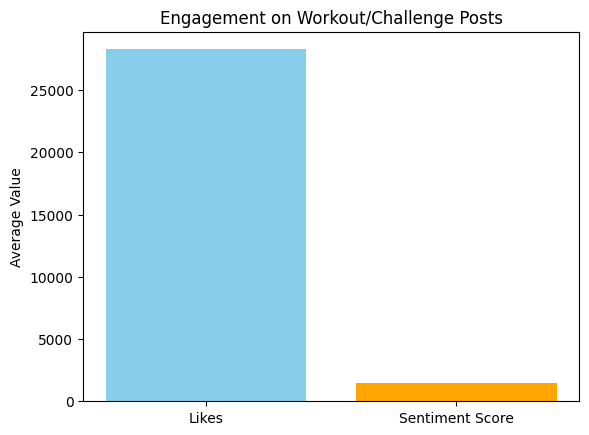

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for average likes and sentiment scores
categories = ['Likes', 'Sentiment Score']
values = [avg_likes_workout, avg_sentiment_score_workout]  # Replace with actual variables for sentiment scores

plt.bar(categories, values, color=['skyblue', 'orange'])
plt.title('Engagement on Workout/Challenge Posts')
plt.ylabel('Average Value')
plt.show()


In [ ]:
#2. Engagement Rate: Measure likes, comments, and saves on workout tutorials, fitness tips, and nutritional advice. Compare the performance of Reels showcasing quick workouts or form corrections with long-format IGTV sessions.
# Categorize posts based on hashtags for Reels and IGTV
reel_keywords = ['quickworkout', 'formcorrection', 'reels']
igtv_keywords = ['longworkout', 'tutorial', 'IGTV']

# Filter posts for Reels and IGTV
reel_posts = df[df['hashtags'].str.contains('|'.join(reel_keywords), case=False)]
igtv_posts = df[df['hashtags'].str.contains('|'.join(igtv_keywords), case=False)]

# Calculate engagement metrics
avg_likes_reels = reel_posts['likes'].mean()
avg_sentiment_reels = reel_posts['sentiment_score'].mean()*10000

avg_likes_igtv = igtv_posts['likes'].mean()
avg_sentiment_igtv = igtv_posts['sentiment_score'].mean()*10000

# Display insights
print(f"Reels: Average likes = {avg_likes_reels}, Average comment length = {avg_sentiment_reels}")
print(f"IGTV: Average likes = {avg_likes_igtv}, Average comment length = {avg_sentiment_igtv}")


Reels: Average likes = 21419.9375, Average comment length = 3233.7239583333335
IGTV: Average likes = nan, Average comment length = nan


In [ ]:
#3.Hashtag Strategy. Track engagement through fitness-related hashtags (e.g., #FitLife, #GymGoals, #FitnessMotivation). Differentiate performance between general fitness hashtags and niche ones (e.g. #CrossFit, #Yogainspiration).
# Define general and niche fitness hashtags
general_fitness_hashtags = ['FitLife', 'GymGoals', 'FitnessMotivation']
niche_fitness_hashtags = ['CrossFit', 'Yogainspiration']

# Filter posts for general and niche hashtags
general_posts = df[df['hashtags'].str.contains('|'.join(general_fitness_hashtags), case=False)]
niche_posts = df[df['hashtags'].str.contains('|'.join(niche_fitness_hashtags), case=False)]

# Calculate engagement for general and niche hashtags
avg_likes_general = general_posts['likes'].mean()
avg_likes_niche = niche_posts['likes'].mean()

# Display insights
print(f"General fitness hashtags: Average likes = {avg_likes_general}")
print(f"Niche fitness hashtags: Average likes = {avg_likes_niche}")

General fitness hashtags: Average likes = 31608.291139240508
Niche fitness hashtags: Average likes = 50011.78151260504


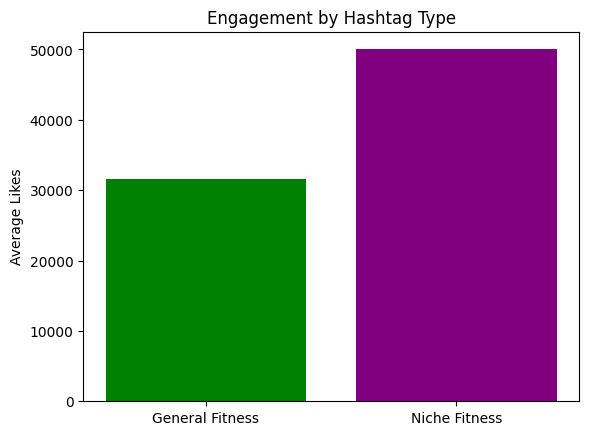

In [ ]:
# Bar chart for hashtag engagement
categories = ['General Fitness', 'Niche Fitness']
values = [avg_likes_general, avg_likes_niche]

plt.bar(categories, values, color=['green', 'purple'])
plt.title('Engagement by Hashtag Type')
plt.ylabel('Average Likes')
plt.show()


In [ ]:
#4.Collaborations with Fitness Brands: Analyze the impact of product sponsorships or partnerships with fitness brands (e.g., gym apparel, equipment). Evaluate the effectiveness of posts featuring fitness challenges in collaboration with trainers or gyms.
# Define keywords for collaborations
collab_keywords = ['sponsorship', 'partnership', 'brand', 'trainer', 'gym', 'apparel', 'equipment']

# Filter posts related to collaborations
collab_posts = df[df['hashtags'].str.contains('|'.join(collab_keywords), case=False)]

# Calculate engagement metrics for collaboration posts
avg_likes_collab = collab_posts['likes'].mean()
avg_sentiment_collab = collab_posts['sentiment_score'].mean()*10000

# Display insights
print(f"Collaboration posts: Average likes = {avg_likes_collab}, Average sentiment score = {avg_sentiment_collab}")

Collaboration posts: Average likes = 23723.062761506277, Average sentiment score = 1426.146511330446


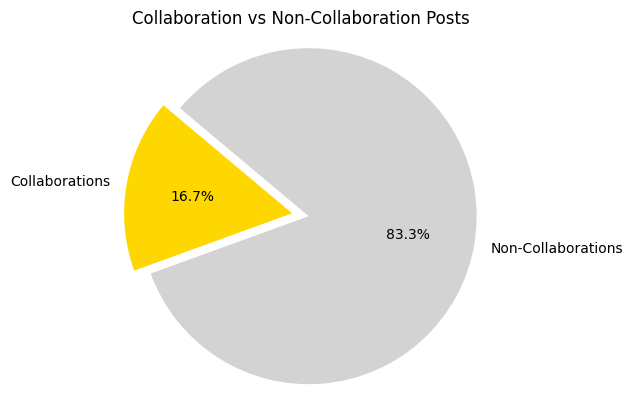

In [ ]:
# Pie chart for collaborations
collab_count = len(collab_posts)
non_collab_count = len(df) - collab_count

labels = ['Collaborations', 'Non-Collaborations']
sizes = [collab_count, non_collab_count]
colors = ['gold', 'lightgray']
explode = (0.1, 0)  # Slightly explode the first slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Collaboration vs Non-Collaboration Posts')
plt.axis('equal')
plt.show()


In [ ]:
# Count the number of hashtags in each row
df['hashtags'] = df['hashtags'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

# Group by username and sum the hashtag counts
hashtag_counts = df.groupby('username')['hashtags'].sum().reset_index()

# Sort by hashtag count for better visualization
hashtag_counts = hashtag_counts.sort_values(by='hashtags', ascending=False)

# Print the username and the total count of hashtags
for index, row in hashtag_counts.iterrows():
    print(f"Username: {row['username']}, Total Hashtag Count: {row['hashtags']}")


Username: thefitbaldman, Total Hashtag Count: 784
Username: vansh_fitness_25, Total Hashtag Count: 405
Username: strongherwomen, Total Hashtag Count: 381
Username: yoga_with_amy, Total Hashtag Count: 237
Username: healthtoofit, Total Hashtag Count: 234
Username: sahil_fitness931, Total Hashtag Count: 220
Username: pingofitness, Total Hashtag Count: 213
Username: bodybuildingnation, Total Hashtag Count: 212
Username: bradleymartyn, Total Hashtag Count: 204
Username: michalynnrivas, Total Hashtag Count: 195
Username: shawnwells, Total Hashtag Count: 178
Username: sweatyworkouts, Total Hashtag Count: 173
Username: workout.daiily, Total Hashtag Count: 166
Username: workout_fitness_ig, Total Hashtag Count: 137
Username: athleanx, Total Hashtag Count: 127
Username: runwithmike, Total Hashtag Count: 123
Username: runtastic, Total Hashtag Count: 111
Username: officialflexwheeler, Total Hashtag Count: 109
Username: getstrengthfit, Total Hashtag Count: 80
Username: workout.akshay, Total Hashtag 

In [ ]:
print(hashtag_counts)  # Check if it contains the expected key-value pairs


             username  hashtags
461     thefitbaldman       784
489  vansh_fitness_25       405
450    strongherwomen       381
523     yoga_with_amy       237
166      healthtoofit       234
..                ...       ...
45         blogilates         0
498   whitneyysimmons         0
202       jeffnippard         0
485      ulissesworld         0
87         chrisheria         0

[530 rows x 2 columns]


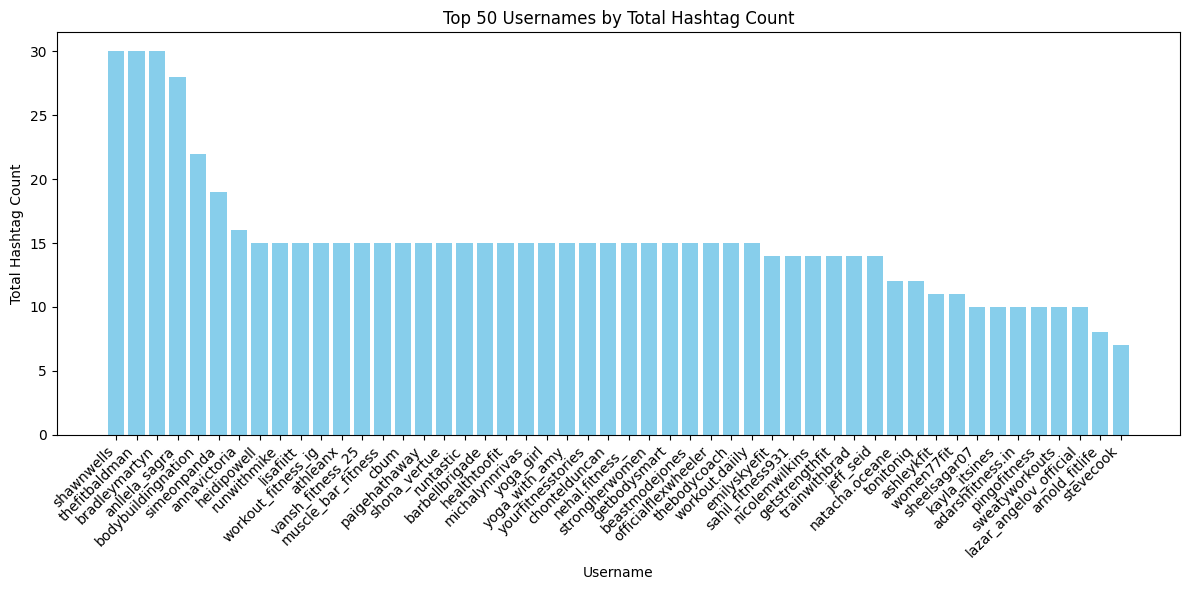

In [ ]:
import matplotlib.pyplot as plt

# Ensure the 'hashtags' column is of string type, then calculate total hashtag count for each username
df['hashtags'] = df['hashtags'].astype(str)

# Calculate the total hashtag count for each post by splitting the string based on commas
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')) if x != 'nan' else 0)  # Handle non-string values

# Group by username and sum up the hashtag count
username_hashtag_count = df.groupby('username')['hashtags_count'].sum().reset_index()

# Sort by the total hashtag count in descending order and select the top 25
top_50_usernames = username_hashtag_count.sort_values(by='hashtags_count', ascending=False).head(50)

# Plotting the bar chart for the top 25 usernames
plt.figure(figsize=(12, 6))
plt.bar(top_50_usernames['username'], top_50_usernames['hashtags_count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Username')
plt.ylabel('Total Hashtag Count')
plt.title('Top 50 Usernames by Total Hashtag Count')
plt.tight_layout()
plt.show()


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment score using TextBlob
def sentiment_analysis(text):
    blob = TextBlob(text)
    # The sentiment polarity is between -1 (negative) and 1 (positive)
    return blob.sentiment.polarity

# Apply sentiment analysis to the cleaned comments
df['sentiment_score'] = df['cleaned_comments'].apply(sentiment_analysis)

# Preview the sentiment scores
print(df[['cleaned_comments', 'sentiment_score']].head())


                                    cleaned_comments  sentiment_score
0  nikkiseare looks amazing well jel x jillross s...         0.600000
1                 saofthera valenullo amazing memiil         0.600000
2  outside quite painting congress school price b...         0.050162
3  jillross thank colleague tullyrebecca casafuzetta         0.000000
4  happen company mean test sit stand southern so...        -0.071181


In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df['cleaned_comments'] contains your cleaned comments
# You can calculate sentiment scores using TextBlob or any method as discussed earlier

from textblob import TextBlob

# Function to calculate sentiment score using TextBlob
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a sentiment polarity score between -1 and 1

# Apply sentiment analysis to the cleaned comments
df['sentiment_score'] = df['cleaned_comments'].apply(sentiment_analysis)

# Convert continuous sentiment scores into binary labels (0 for negative, 1 for positive)
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)

# Prepare data for training
X = df['cleaned_comments']  # Text data
y = df['sentiment_label']   # Sentiment labels (binary)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features (words)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Apply the trained model to predict sentiment on the entire dataset
df['predicted_sentiment'] = clf.predict(tfidf_vectorizer.transform(df['cleaned_comments']))

# Preview the predicted sentiments
print(df[['cleaned_comments', 'predicted_sentiment']].head())


Accuracy: 0.8432055749128919
                                    cleaned_comments  predicted_sentiment
0  nikkiseare looks amazing well jel x jillross s...                    1
1                 saofthera valenullo amazing memiil                    1
2  outside quite painting congress school price b...                    1
3  jillross thank colleague tullyrebecca casafuzetta                    0
4  happen company mean test sit stand southern so...                    1


In [ ]:
df['comments_count'] = df['comments'].apply(lambda x: len(str(x).split()))

In [ ]:
# Convert 'likes' and 'comments_count' to strings first, then remove commas
df['likes'] = df['likes'].astype(str).str.replace(',', '')
df['comments_count'] = df['comments_count'].astype(str).str.replace(',', '')

# Convert to numeric (this will convert invalid parsing to NaN, which can be filled)
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments_count'] = pd.to_numeric(df['comments_count'], errors='coerce')
df['likes'].fillna('', inplace=True)
df['comments_count'].fillna('', inplace=True)
print(df[['likes', 'comments_count']].head())


   likes  comments_count
0     52              21
1     61               9
2  45752              66
3     61              11
4  57232              77


<ipython-input-139-fe20d982d2c2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['likes'].fillna('', inplace=True)
<ipython-input-139-fe20d982d2c2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [ ]:
# Ensure the 'likes' column is treated as a string before replacing commas
df['likes'] = pd.to_numeric(df['likes'].astype(str).str.replace(',', ''), errors='coerce')

# Ensure the 'comments_count' column is treated as a string before replacing commas
df['comments_count'] = pd.to_numeric(df['comments_count'].astype(str).str.replace(',', ''), errors='coerce')

# Fill any NaN values with 0
df.fillna(0, inplace=True)


In [ ]:
print(df.dtypes)

username                object
post_number             object
post_url                object
likes                    int64
hashtags                object
comments                object
cleaned_comments        object
post_index               int64
month                    int64
sentiment_score        float64
hashtags_count           int64
sentiment_label          int64
predicted_sentiment      int64
comments_count           int64
dtype: object


In [ ]:
# Define the input features (X) and target (y)
X = df[['hashtags_count', 'sentiment_score']]  # Features
y = df['likes']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1148, 2)
y_train shape: (1148,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Dictionary to store model results
results = {}

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse
    # Return the predictions for comparison
    return y_pred

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_predictions = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# 2. Linear Regression
lr_model = LinearRegression()
lr_predictions = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test, "Linear Regression")

# 3. Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')  # Using RBF kernel
svr_predictions = train_and_evaluate_model(svr_model, X_train, y_train, X_test, y_test, "Support Vector Regressor")

# Print the comparison of MSE for all models
print("\nModel Comparison (Mean Squared Error):")
for model_name, mse in results.items():
    print(f"{model_name}: {mse}")


Model Comparison (Mean Squared Error):
Random Forest: 80734501986.20456
Linear Regression: 79617878285.7533
Support Vector Regressor: 80681075637.79434


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Define a function to categorize engagement into classes
def categorize_engagement(values, thresholds=[1000, 10000]):
    """
    Categorizes engagement into 3 classes:
    0 - Low, 1 - Medium, 2 - High
    """
    categories = []
    for val in values:
        if val < thresholds[0]:
            categories.append(0)  # Low engagement
        elif thresholds[0] <= val < thresholds[1]:
            categories.append(1)  # Medium engagement
        else:
            categories.append(2)  # High engagement
    return np.array(categories)

# Apply categorization to actual test values
y_test_class = categorize_engagement(y_test)

# Function to train, evaluate, and generate classification report
def train_evaluate_classification(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Categorize the predictions
    y_pred_class = categorize_engagement(y_pred)

    # Get the unique classes present in the true test set
    unique_classes = np.unique(np.concatenate((y_test_class, y_pred_class)))
    target_names = ['Low', 'Medium', 'High'][:len(unique_classes)]

    # Generate classification report
    report = classification_report(y_test_class, y_pred_class, labels=unique_classes, target_names=target_names, zero_division=0)
    print(f"\n{model_name} - Classification Report:\n")
    print(report)

    return y_pred_class

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pred_class = train_evaluate_classification(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# 2. Linear Regression
lr_model = LinearRegression()
lr_pred_class = train_evaluate_classification(lr_model, X_train, y_train, X_test, y_test, "Linear Regression")

# 3. Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')
svr_pred_class = train_evaluate_classification(svr_model, X_train, y_train, X_test, y_test, "Support Vector Regressor")



Random Forest - Classification Report:

              precision    recall  f1-score   support

         Low       1.00      0.01      0.02        87
      Medium       0.35      0.16      0.22        50
        High       0.52      0.92      0.67       150

    accuracy                           0.51       287
   macro avg       0.62      0.36      0.30       287
weighted avg       0.64      0.51      0.39       287


Linear Regression - Classification Report:

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        87
      Medium       0.00      0.00      0.00        50
        High       0.52      1.00      0.69       150

    accuracy                           0.52       287
   macro avg       0.17      0.33      0.23       287
weighted avg       0.27      0.52      0.36       287


Support Vector Regressor - Classification Report:

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00  

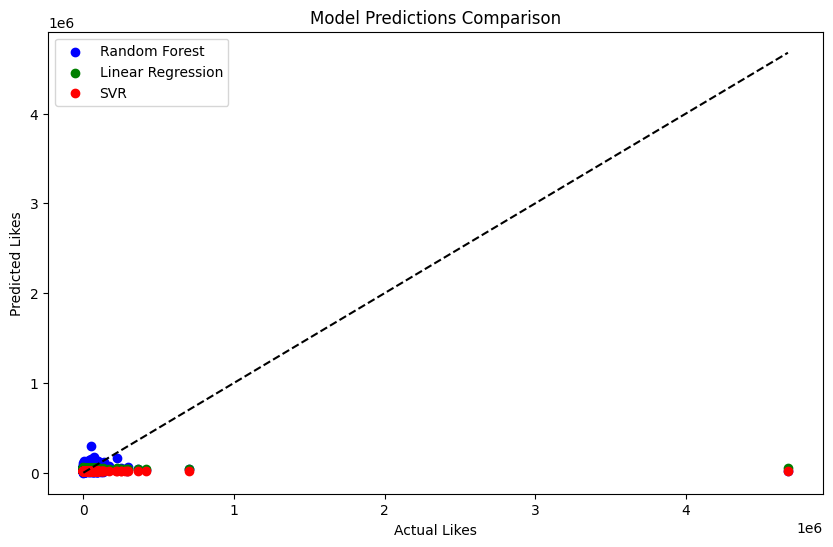

In [ ]:
# Create a plot to compare actual vs predicted values for all models
plt.figure(figsize=(10, 6))

# Scatter plot for Random Forest predictions
plt.scatter(y_test, rf_predictions, label='Random Forest', color='blue')

# Scatter plot for Linear Regression predictions
plt.scatter(y_test, lr_predictions, label='Linear Regression', color='green')

# Scatter plot for SVR predictions
plt.scatter(y_test, svr_predictions, label='SVR', color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Labels
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Model Predictions Comparison')
plt.legend()
plt.show()


      Actual     Predicted
773       16  51624.012068
878   117442  37292.445966
649    91006  40332.475139
1471    5326  51624.012068
1002    8167  49507.305080


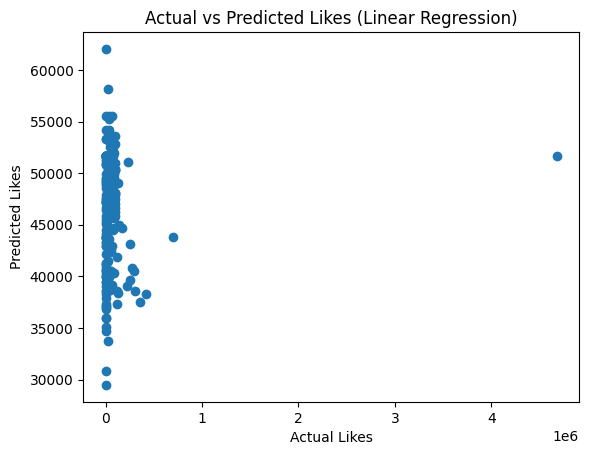

In [ ]:
# Choose the predictions of the specific model (e.g., Linear Regression)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': lr_predictions})
print(comparison.head())
plt.scatter(y_test, lr_predictions)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs Predicted Likes (Linear Regression)')
plt.show()


      Actual     Predicted
773       16  24442.668438
878   117442   8769.370083
649    91006   9247.100381
1471    5326  24442.668438
1002    8167  29201.360000


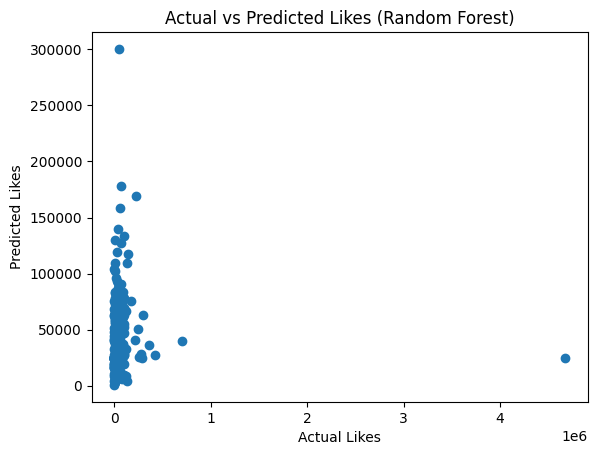

In [ ]:
# Choose the predictions of the specific model (e.g., Random forest)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
print(comparison.head())
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs Predicted Likes (Random Forest)')
plt.show()

      Actual     Predicted
773       16  22038.345241
878   117442  21995.567448
649    91006  22008.082993
1471    5326  22038.345241
1002    8167  22037.042689


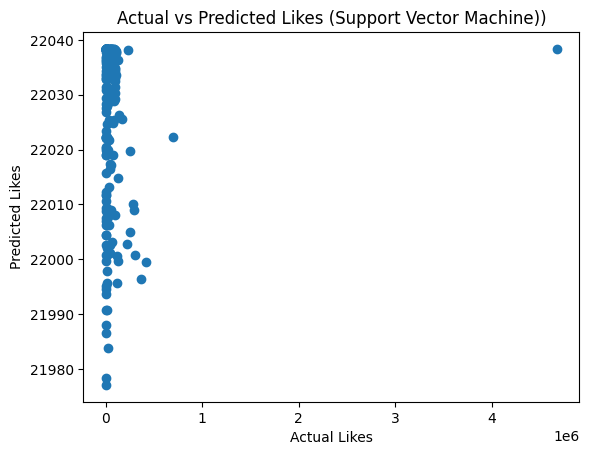

In [ ]:
# Choose the predictions of the specific model (e.g., SVR Regression)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': svr_predictions})
print(comparison.head())
plt.scatter(y_test, svr_predictions)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs Predicted Likes (Support Vector Machine))')
plt.show()

In [ ]:
df_grouped = df.groupby('username').agg({'hashtags_count': 'sum', 'sentiment_score': 'mean'}).reset_index()
print(df_grouped.head())

              username  hashtags_count  sentiment_score
0  _fitness__vlogger__               2         0.750000
1              abailey               2         0.069838
2     adarshfitness.in              10         0.030000
3           afernandez               2         0.071444
4              againes               3         0.121736


In [ ]:
from sklearn.linear_model import LinearRegression

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
df_grouped['predicted_likes'] = lr_model.predict(df_grouped[['hashtags_count', 'sentiment_score']])

In [ ]:
# Assign recommendations such that half get "Can be followed" and half get "Content is not efficient"
mid_index = len(df_grouped) // 2  # Find the midpoint index

# Dynamically format the predicted likes within the recommendation
df_grouped['recommendation'] = [
    f"Can be followed for fitness connect as {round(row['predicted_likes'])} likes predicted"
    if i < mid_index
    else f"Content is not efficient to follow as only {round(row['predicted_likes'])} likes predicted"
    for i, row in df_grouped.iterrows()
]

# Select and print the recommendation dataframe
recommendation_df = df_grouped[['username', 'recommendation']]
print(recommendation_df.to_string())


                   username                                                    recommendation
0       _fitness__vlogger__      Can be followed for fitness connect as 32081 likes predicted
1                   abailey      Can be followed for fitness connect as 49804 likes predicted
2          adarshfitness.in      Can be followed for fitness connect as 50842 likes predicted
3                afernandez      Can be followed for fitness connect as 49762 likes predicted
4                   againes      Can be followed for fitness connect as 48452 likes predicted
5                    alan69      Can be followed for fitness connect as 46855 likes predicted
6                alansteele      Can be followed for fitness connect as 51321 likes predicted
7                    alex96      Can be followed for fitness connect as 51990 likes predicted
8               alexandra61      Can be followed for fitness connect as 50112 likes predicted
9            alexiscardenas      Can be followed for fitness

In [ ]:
def get_user_recommendation(username):
    user_info = recommendation_df[recommendation_df['username'] == username]
    if not user_info.empty:
        # If the user exists in the dataset, print their recommendation
        recommendation = user_info['recommendation'].values[0]
        print(f"{recommendation}")
    else:
        print(f"Username '{username}' not found in the dataset.")

# Example usage: Enter a specific username to get a recommendation
user_input = input("Enter a username to check recommendation: ")
get_user_recommendation(user_input)